

<h2 align="center">Multiple Linear Regression</h2>

Linear Regression is a useful tool for predicting a quantitative response.

We have an input vector $X^T = (X_1, X_2,...,X_p)$, and want to predict a real-valued output $Y$. The linear regression model has the form

<h4 align="center"> $f(x) = \beta_0 + \sum_{j=1}^p X_j \beta_j$. </h4>

The linear model either assumes that the regression function $E(Y|X)$ is linear, or that the linear model is a reasonable approximation.Here the $\beta_j$'s are unknown parameters or coefficients, and the variables $X_j$ can come from different sources. No matter the source of $X_j$, the model is linear in the parameters.

**Simple Linear Regression**: <h5 align=center>$$Y = \beta_0 + \beta_1 X + \epsilon$$</h5>

**Multiple Linear Regression**: <h5 align=center>$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 +...+ \beta_p X_p + \epsilon$$ </h5>
<h5 align=center> $$sales = \beta_0 + \beta_1 \times TV + \beta_2 \times radio + \beta_3 \times newspaper + \epsilon$$ </h5>

Analysis can be extended to include multiple predictors using Multiple Linear Regression

Different predictors are given different slope coefficients (beta values) 

X_j : jth predictor

beta_j : quantifies association between jth predictor and response

Using multiple variable linear regression we are going to interpret each beta_j as average effect of increase in that predictor, while keeping sll the other predictors fixed.

### Task 1: Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)

### Task 2: Load the Data

The adverstiting dataset captures sales revenue generated with respect to advertisement spends across multiple channles like radio, tv and newspaper.

In [7]:
advert =  pd.read_csv(r'C:\Users\alroy Lobo\Desktop\DJ\COURSES\Coursera\Guided Projects\Multiple Linear Regression with scikit-learn\Advertising (1).csv')
advert.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
radio         200 non-null float64
newspaper     200 non-null float64
sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


### Task 3: Relationship between Features and Response

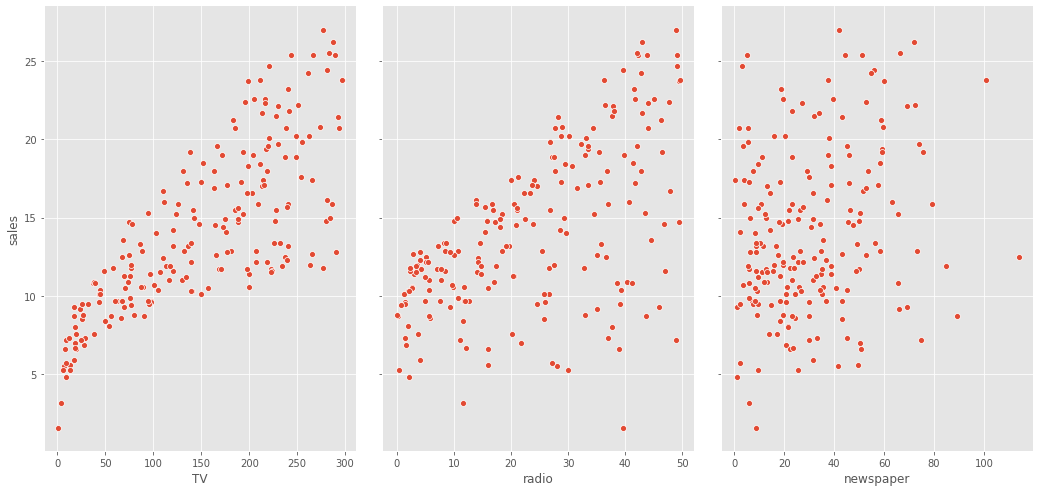

In [9]:
sns.pairplot(advert, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', height = 7, aspect = 0.7)

### Task 4: Multiple Linear Regression - Estimating Coefficients

In [10]:
from sklearn.linear_model import LinearRegression

X = advert[['TV', 'radio', 'newspaper']]
y = advert.sales

lm1 = LinearRegression()
lm1.fit(X, y)

print(lm1.intercept_)
print(lm1.coef_)


2.9388893694594067
[ 0.04576465  0.18853002 -0.00103749]


In [11]:
list(zip(['TV', 'radio', 'newspaper'], lm1.coef_))       #coefficients corresponding to predictors

[('TV', 0.04576464545539761),
 ('radio', 0.18853001691820462),
 ('newspaper', -0.0010374930424762972)]

Inferences:

beta_2 (coeffecient for radio) = 0.18853001691820462: For a given amount of TV and newspaper advertising spending an extra 1000 USD on radio results in an increase in sales of approx 188 units(beta_2 * 1000).


beta_3 (coeffecient for newspaper)= -0.0010374930424762972: This coefficient is quite different from the one obtained through simple linear regression because in simple linear only the averaging effect over the newspaper variable is considered. But in multiple variable linear regression the effect of advertising of TV and radio on sales of newspaper is also taken and the correaltion between newspaper and radio to justify this can be seen in the correlation matrix below.


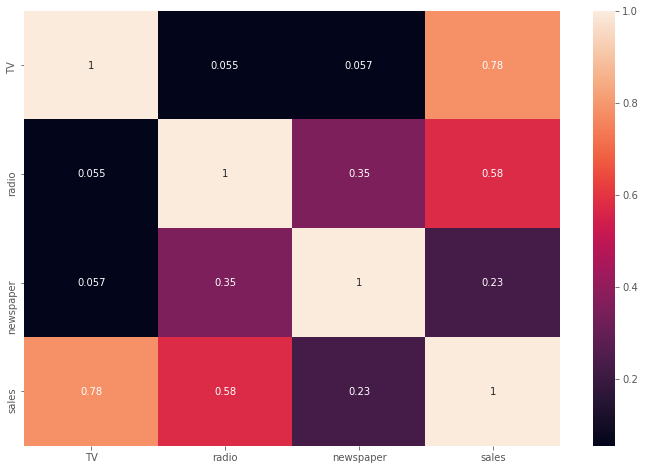

In [12]:
sns.heatmap(advert.corr(), annot = True)  # Pictorial representation of correlation

The 0.35 correlation coeff between newspapers and radio shows a tedency to spend more on advertising of newspapers where lot it is spent of radio advertising

### Task 5: Feature Selection

A few important points/ questions need to be considered while performing multiple variable linear regression

1. Is atleast one of the predictors useful in predicting the response?

2. Are all the predictors involved in predicting the response or how many of the predictors are useful in predicting the response?

3. How well does the model fit the data?

4. Given predictors value what response to predict and what is the accuracy of that prediction?




Feature selection is used to determine which predictor or subset of predictors is useful in predicting the response.


In [13]:
from sklearn.metrics import r2_score

lm2 = LinearRegression().fit(X[['TV','radio']], y)
lm2_preds = lm2.predict(X[['TV','radio']])

print("R^2 : ", r2_score(y, lm2_preds))           # use r2 score metric to evaluate the model with predictor TV and radio

R^2 :  0.8971942610828956


In [15]:
lm3 = LinearRegression().fit(X[['TV','radio','newspaper']], y)
lm3_preds = lm3.predict(X[['TV','radio','newspaper']])

print("R^2 : ", r2_score(y, lm3_preds))           # use r2 score metric to evaluate the model with predictor TV, radio and newspaper

R^2 :  0.8972106381789522


R^2 score signifies the fraction of the variance explained in the response variable(closer to 1 the better). 

In multiple linear regression R^2 is equal to the square of the correlation between the response and fitted linear model

R2 score of the second case is greater than the first by a very small margin, hence adding newspaper predictor to the model increases the performance by only a small margin hence can be avoided

### Task 6: Model Evaluation Using Train/Test Split and Metrics

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors: <h5 align=center>$$\frac{1}{n}\sum_{i=1}^{n} \left |y_i - \hat{y_i} \right |$$</h5>
**Mean Squared Error** (MSE) is the mean of the squared errors: <h5 align=center>$$\frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y_i})^2$$</h5>
**Root Mean Squared Error** (RMSE) is the mean of the squared errors: <h5 align=center>$$\sqrt{\frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y_i})^2}$$</h5>


The RMSE amplifies and severly punishes the larger errors, hence lesser the RMSE the better

Let's use train/test split with RMSE to see whether newspaper should be kept in the model:

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = advert[['TV', 'radio', 'newspaper']]
y = advert.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

lm4 = LinearRegression().fit(X_train, y_train)
lm4_preds = lm4.predict(X_test)

print("RMSE : ", np.sqrt(mean_squared_error(y_test,lm4_preds)))
print("R^2 : ", r2_score(y_test, lm4_preds))

RMSE :  1.4046514230328955
R^2 :  0.9156213613792232


In [19]:
X = advert[['TV', 'radio']]
y = advert.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

lm5 = LinearRegression().fit(X_train, y_train)
lm5_preds = lm5.predict(X_test)

print("RMSE : ", np.sqrt(mean_squared_error(y_test,lm5_preds)))
print("R^2 : ", r2_score(y_test, lm5_preds))

RMSE :  1.3879034699382888
R^2 :  0.9176214942248908


The R2 score went up but more importantly the RMSE value decreased hence it is preferred to avoid the predictor newspaper.

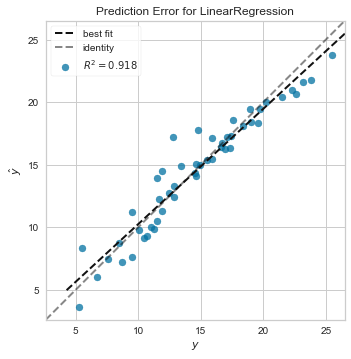

In [21]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

visualizer = PredictionError(lm5).fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

Unexplained variability that model is unable to capture, which can be due to non linearity or synergy effect

### Task 7: Interaction Effect (Synergy)

In a multiple regression, is assumed that the effect on the target of increasing one unit of one predictor (is independent|has no influence) on the other predictor. ... In marketing, this is known as a synergy effect, and in statistics it is referred to as an interaction effect.


Hence we include an interaction term in our model that is basically just the multiplication of the TV and radio columns in this case. 

Coeffcient of interaction term can be interpreted as increase in effectiveness of TV advertising for 1 unit increase in radio advertising

In [22]:
advert['interaction'] = advert['TV'] * advert['radio']

X = advert[['TV', 'radio', 'interaction']]
y = advert.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

lm6 = LinearRegression().fit(X_train, y_train)
lm6_preds = lm6.predict(X_test)

print("RMSE : ", np.sqrt(mean_squared_error(y_test,lm6_preds)))
print("R^2 : ", r2_score(y_test, lm6_preds))

RMSE :  0.7011871137164326
R^2 :  0.9789736814681261


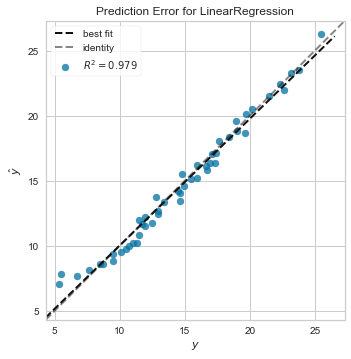

In [23]:
visualizer = PredictionError(lm6).fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()